In [166]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
import numpy as np

In [147]:
#to limit memomry growth

# gpus=tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)

removing dodgy images

In [167]:
import cv2
import imghdr

In [168]:
data_dir='data'

In [169]:
image_exts=['jpg','jpeg','png','bmp']

In [164]:
#passing through every image of the happy folder 

#os.listdir(os.path.join(data_dir,'happy'))

In [170]:
img=cv2.imread(os.path.join('data','happy','1_617fd22d3f013.jpg'))

In [171]:
img.shape 

(631, 1200, 3)

/|\ height,width,color format

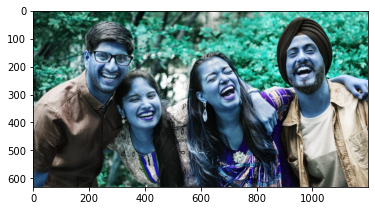

In [154]:
plt.imshow(img)
plt.show()
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [172]:
#goes in the data folder
for image_class in os.listdir(data_dir):
    #goes in the happy or sad folder
    for image in os.listdir(os.path.join(data_dir,image_class)):
        #gets all the image paths in the file 
        img_path=os.path.join(data_dir,image_class,image)
        try:
            #loading image
            img=cv2.imread(img_path)
            #checking image format and removing
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('Image not in list {}'.format(img_path))
                os.remove(img_path)
                
        except Exception as e:
            print('Issue with image {}'.format(img_path))
        

Load Data

In [173]:
data=tf.keras.utils.image_dataset_from_directory('data')
#data_pipeline

Found 364 files belonging to 2 classes.


In [174]:
data_iter=data.as_numpy_iterator()
#allowinf us to access data pipeline by loopig

In [175]:
batch=data_iter.next()
#pull out batches and iter through it

In [139]:
len(batch)

2

In [140]:
#batch[0]-image as numpy array
#batch[1]-label
batch[0].shape

(32, 256, 256, 3)

no. of images in a batch,length,width and color scale of each image

In [141]:
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

class1-sad
class0-happy

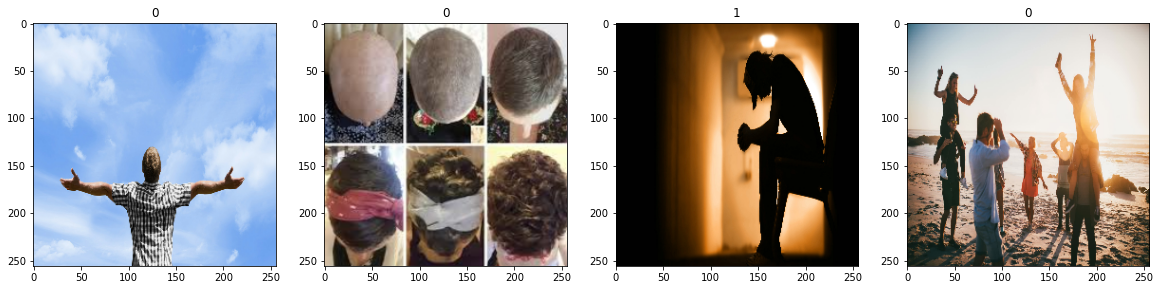

In [176]:
#to find the signinficance of labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [115]:
batch[0].max()

255.0

In [119]:
#scaling the values to b/w 0 and 1
scaled=batch[0]/255

In [177]:
#scaling in the data pipeline 
# map to appply the transformation in the data pipeline
#x for images
#y for labels
data = data.map(lambda x,y: (x/255, y))

In [178]:
data.as_numpy_iterator.next()

AttributeError: 'function' object has no attribute 'next'

In [82]:
scaled_iter=data.as_numpy_iterator()
batch_testing=scaled_iter.next()

In [83]:
batch_testing[0].max()

1.0

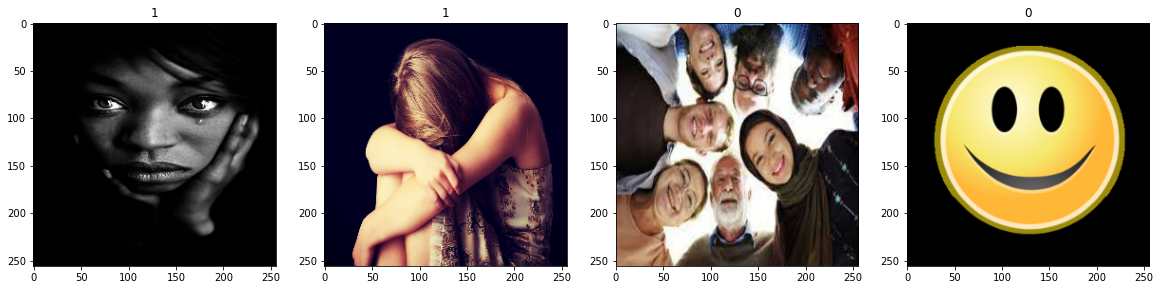

In [84]:
#to find the signinficance of labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_testing[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_testing[1][idx])

Splitting

In [85]:
len(data)#-no.of batches

12

In [86]:
train_size = int(len(data)*0.7) #8
val_size = int(len(data)*0.2)+1 #3
test_size = int(len(data)*0.1) #1

In [87]:
val_size+test_size+train_size


12

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [90]:
model=Sequential()

In [ ]:
#input layer of images
#16 layers,3 by 3 pixels, movels 1 pixel with each stride
model.add(Conv2D(16(3,3),1,activation='relu',input_shape=(256,256,3)))
#condenses the information
model.add(MaxPooling2D)

model.add(Conv2D(32(3,3),1,activaton='relu'))
model.add(MaxPooling2D)

model.add(Conv2D(16(3,3),1,activaton='relu'))
model.add(MaxPooling2D)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))